# Lectura de datos

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd

Mounted at /content/gdrive
/content


In [2]:
%cd "/content/gdrive/MyDrive/Semestre IA/Aprendizaje automático"
!ls

/content/gdrive/MyDrive/Semestre IA/Aprendizaje automático
'Clusters in  finance.ipynb'	  Mejora_Framework.ipynb
'Hierarchical Clustering.ipynb'  'Modelo con framework.ipynb'
'KMeans sklearn blobs.ipynb'	  Raisin_Dataset.xlsx
'Linear Regression.ipynb'


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# For plots in Jupyter Notebooks
%matplotlib inline    

In [4]:
# Carga y lectura del data set
df = pd.read_excel('Raisin_Dataset.xlsx')

# Modelo inicial

In [5]:
# Creación del modelo de regresión lineal
model = LinearRegression(fit_intercept=True)

In [6]:
# Asignación de "x" y "y" para el modelo
x = df[["Eccentricity", "Perimeter"]]
y = df['Area']

In [7]:
# Separación de los datos en train y en test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

Entrenamiento del modelo

In [8]:
model.fit(x_train, y_train)

LinearRegression()

In [9]:
model.coef_

array([-53418.18076442,    143.42928279])

In [10]:
model.intercept_

-37775.25785321105

Train

In [11]:
# T R A I N : Predicciones del modelo
yfit_train = model.predict(x_train)

In [12]:
# Mean Square Error de los datos predichos contra los datos reales
mean_squared_error(y_train, yfit_train)

102413469.45534767

In [13]:
# Precisión del modelo
r2_score(y_train, yfit_train)

0.9302210104824834

Test

In [14]:
# T E S T : Predicciones del modelo
yfit_test = model.predict(x_test)

In [15]:
# Mean Square Error de los datos predichos contra los datos reales
mean_squared_error(y_test, yfit_test)

86487798.58356188

In [16]:
# Precisión del modelo
r2_score(y_test, yfit_test)

0.9481185406143141

Cross Validation

In [17]:
# Cross Validation del modelo
abs(cross_val_score(LinearRegression(), x_train, y_train, cv=10, scoring = "r2").mean())

0.9288839922985004

Plot

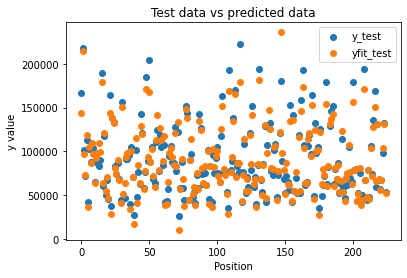

In [18]:
plt.scatter(range(len(y_test)), y_test, label = 'y_test')
plt.scatter(range(len(y_test)), yfit_test, label = 'yfit_test')
plt.ylabel("y value")
plt.xlabel("Position")
plt.legend()
plt.title("Test data vs predicted data")

plt.show()

# Mejora del modelo

Con el fin de evaluar las posibles formas de mejora, se buscó la correlación de las varibles del dataset con nuestra "y", que es el área.

In [19]:
correlation = df.corr()["Area"]
correlation.sort_values(ascending=False)

Area               1.000000
ConvexArea         0.995920
Perimeter          0.961352
MajorAxisLength    0.932774
MinorAxisLength    0.906650
Eccentricity       0.336107
Extent            -0.013499
Name: Area, dtype: float64

La gran mayoría de las variables están fuertemente correlacionadas, teniendo cercanía con el 1, a excepción de la Eccentricity y el Extent, por lo que podemos descartar estas variables de nuestro modelo y tomar las demás.

In [20]:
# Creación del modelo de regresión lineal
model2 = LinearRegression(fit_intercept=True)

In [21]:
# Asignación de "x" y "y" para el modelo
x = df[["ConvexArea", "Perimeter", "MajorAxisLength", "MinorAxisLength"]]
y = df['Area']

In [22]:
# Separación de los datos en train y en test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

Entrenamiento del modelo

In [23]:
model2.fit(x_train, y_train)

LinearRegression()

In [24]:
model2.coef_

array([  0.90283855, -81.5677566 , 150.19868103, 162.12966509])

In [25]:
model2.intercept_

-5468.337988445244

Train

In [26]:
# T R A I N : Predicciones del modelo
yfit_train = model2.predict(x_train)

In [27]:
# Mean Square Error de los datos predichos contra los datos reales
mean_squared_error(y_train, yfit_train)

4434391.208879115

In [28]:
# Precisión del modelo
r2_score(y_train, yfit_train)

0.996978646077254

Test

In [29]:
# T E S T : Predicciones del modelo
yfit_test = model2.predict(x_test)

In [30]:
# Mean Square Error de los datos predichos contra los datos reales
mean_squared_error(y_test, yfit_test)

3735937.1596187805

In [31]:
# Precisión del modelo
r2_score(y_test, yfit_test)

0.9977589223544987

Cross Validation

In [32]:
# Cross Validation del modelo
abs(cross_val_score(LinearRegression(), x_train, y_train, cv=10, scoring = "r2").mean())

0.9966044232927187

Se puede ver una mejora significativa en comparación al modelo inicial, pasando de un 93% a un 99% de accurancy, incluso con los datos de testeo, por lo que podemos decir que se encuentra fit.

Plot

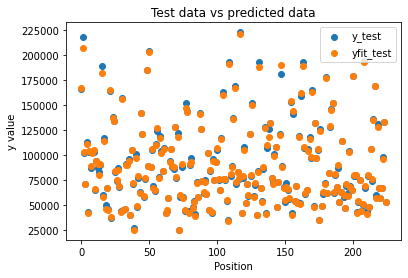

In [33]:
plt.scatter(range(len(y_test)), y_test, label = 'y_test')
plt.scatter(range(len(y_test)), yfit_test, label = 'yfit_test')
plt.ylabel("y value")
plt.xlabel("Position")
plt.legend()
plt.title("Test data vs predicted data")

plt.show()